# （一）有监督：简单线性回归

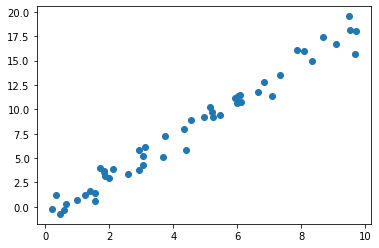

In [23]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

rng = np.random.RandomState(42)
x = 10*rng.rand(50)
y = 2*x - 1 + rng.randn(50)
plt.scatter(x,y)


## 用Scikit-Learn实现简单的线性回归模型
## 1.选择模型类：导入线性回归模型类：

In [24]:
from sklearn.linear_model import LinearRegression

## 2.选择模型超参数：

In [25]:
model = LinearRegression(fit_intercept=True)

## 3.将数据整理成特征矩阵和目标数组

In [26]:
X = x[:,np.newaxis]

## 4.用模型拟合数据：用fit()方法获得的模型参数都带有下划线：

In [27]:
model.fit(X,y)
model.coef_
model.intercept_

-0.9033107255311164

## 5.预测新数据的标签：

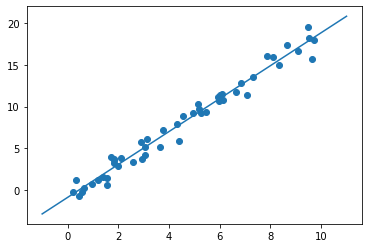

In [29]:
xfit = np.linspace(-1,11)
Xfit = xfit[:,np.newaxis]
yfit = model.predict(Xfit)

plt.scatter(x,y)
plt.plot(xfit,yfit)


# （二）有监督：莺尾花数据分类
## 1.导入数据集：

In [40]:
import seaborn as sns
iris = sns.load_dataset('iris')
X_iris = iris.drop('species',axis=1)
y_iris = iris['species']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2.切分数据集

In [41]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X_iris,y_iris,random_state=1)

## 3.导入、初始化、训练和预测模型

In [42]:
from sklearn.naive_bayes import GaussianNB #1.选择模型类
model = GaussianNB()                       #2.初始化模型
model.fit(Xtrain,ytrain)                   #3.用模型拟合数据
y_model = model.predict(Xtest)             #4.对新数据进行预测


## 4.用accuracy_score工具验证模型预测结果的准确率

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model)


0.9736842105263158

#（三）无监督：莺尾花数据降维
（1）降维的任务是找到一个可以保留数据本质特征的低维矩阵来表示高维数据。
（2）降维通常常用于辅助数据可视化的工作，用二维数据画图比四维甚至更高维的数据图更方便。
主成分分析（PCA），是一种快速线性降维技术。下面，用PCA模型返回两个主成分，也就是用二维数据表示莺尾花的四维数据。

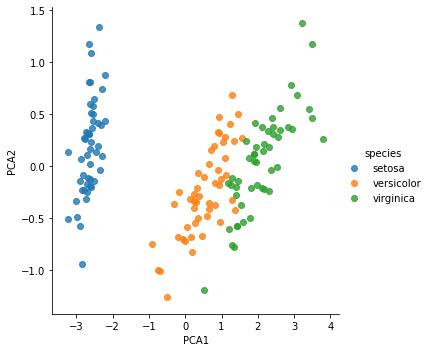

In [44]:
from sklearn.decomposition import PCA #1.选择模型类
model = PCA(n_components=2)           #2.设置超参数
model.fit(X_iris)                     #3.拟合数据，注意这里不用y变量
X_2D = model.transform(X_iris)        #4.将数据转换为二维

iris['PCA1']=X_2D[:,0]
iris['PCA2']=X_2D[:,1]
sns.lmplot("PCA1","PCA2",hue='species',data=iris,fit_reg=False)


# 无监督：莺尾花数据聚类
聚类算法是对没有任何标签的数据集进行分组。下面应用到一个强大的聚类算法：高斯混合模型（GMM），它试图将数据构造成若干服从于高斯分布的概率密度函数簇。

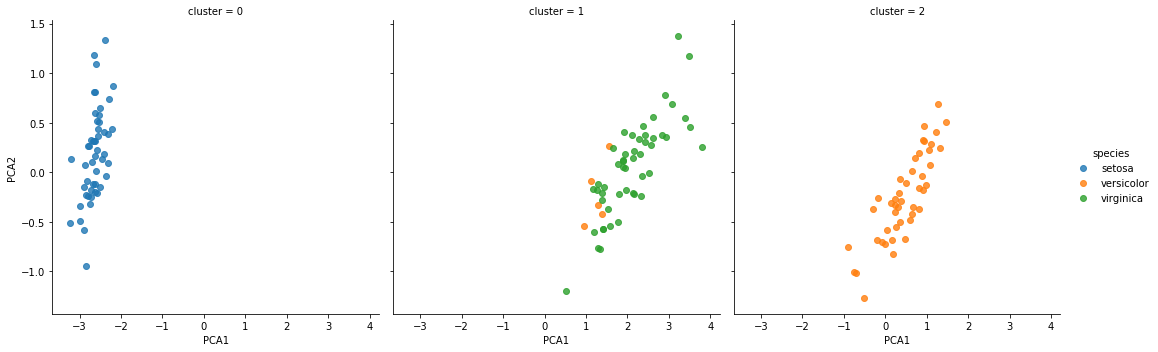

In [46]:
from sklearn.mixture import GaussianMixture #1.选择模型类
model = GaussianMixture(n_components=3, covariance_type='full')#2.设置超参数
model.fit(X_iris)                           #3.拟合数据，注意不需要y变量
y_gmm = model.predict(X_iris)               #4.确定簇标签

iris['cluster'] = y_gmm
sns.lmplot("PCA1","PCA2",data=iris,hue='species',col='cluster',fit_reg=False)


#（四）手写数字识别
## 1.加载并可视化手写数字
用Scikit-Learn的数据获取接口加载数据，并简单统计一下

(1797, 64)
(1797,)


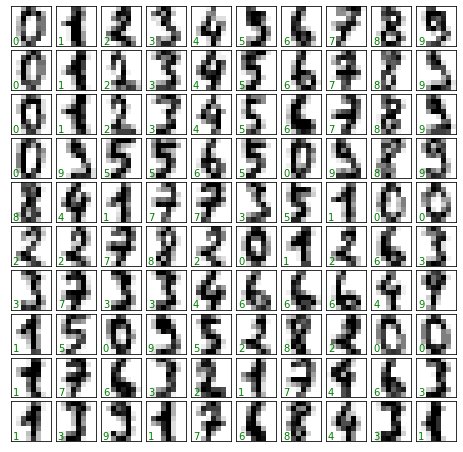

In [64]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

#可视化
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10,10,figsize=(8,8),
                        subplot_kw={'xticks':[],'yticks':[]},
                        gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(digits.target[i]),
            transform=ax.transAxes,color='green')

X = digits.data
y = digits.target
print(X.shape)
print(y.shape)


## 2.用流形学习算法Isomap降维
借助无监督学习方法将数据降到2维。

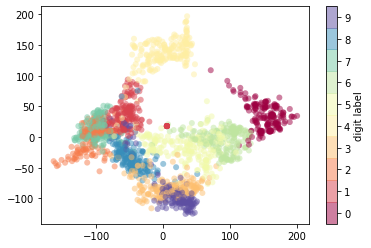

In [58]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(X)
data_projected = iso.transform(X)
plt.scatter(data_projected[:,0],data_projected[:,1],c=y,
            edgecolors='none',alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label',ticks=range(10))
plt.clim(-0.5,9.5)


## 3.用高斯朴素贝叶斯模型进行数字分类
现将数据分成训练集和测试集，然后用高斯朴素贝叶斯模型来拟合。

In [65]:
XXtrain,XXtest,yytrain,yytest = train_test_split(X,y,random_state=0)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(XXtrain,yytrain)
yy_model = model.predict(XXtest)

from sklearn.metrics import accuracy_score
accuracy_score(yytest,yy_model)


0.8333333333333334